## Temas Clase 2:

- Interpretación geométrica de las medidas de tendencia
- Medidas de variabilidad (Rango, varianza, desvío estándar)
- Medidas robustas (percentiles, diagramas de caja y bigote)
- Interpretación geométrica de percentiles
- Polígonos de frecuencias
- Distribución de probabilidad y tipos de variables
- Ejemplo de daditos :D

### Repositorio: https://github.com/dileofrancoj/curso-estadistica

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
from scipy.stats import norm

## Interpretación geométrica de las medidas de tendencia centrales

![Imagen robada de medidas de tendencia](files/medidas-tendencia.png)

## Medidas de variabilidad o dispersión

Las medidas de dispersión indican el grado de concentración de los valores de la variable alrededor de una medida de posición / tendencia central.

Las medidas de dispersión más utilizadas son: **la varianza, la desviación típica**

### Varianza:

La varianza es una medida de dispersión que nos cuenta que tan dispersos están los datos en torno a la media.
Consideremos el siguiente conjunto A = {2,3,6,8,11}

Media(X) = (2+3+6+8+11)/5 = 6

Var(X) = [(x1-x)^2 + (x2 - x)^2 + ... + (xn -x)^2]/ N o dividido n - 1 (concepto de grados de libertad)

En este caso: 
Varianza = [(2-6)^2 + (3-6)^2 + (6-6)^2 + (8-6)^2 + (11-6)^2] / 5 = 10.8

Como vemos, al estar en unidades cuadradas, la varianza no nos da un resultado tan directo para interpretar, por eso, muy a menudo, usaremos la desviación estándar

DS = Sqrt(Varianza) 

En este caso:

DS = 3,28

### Desviación estándar

Nuevamente, esta medida de dispersión nos dice cual es la variación de los datos respecto de la media. Una DS baja indica que la mayor parte de los datos tienden a estar agrupados cerca de su media.

media 8.5, varianza 7.5 y stdev 2.7386127875258306 del conjunto


([<matplotlib.axis.XTick at 0x135a1e770>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

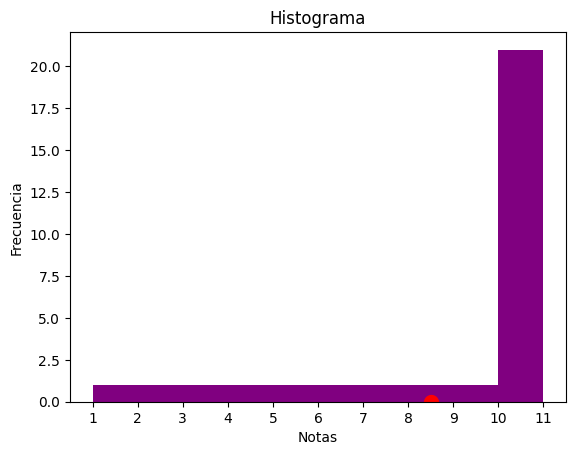

In [13]:
notasAlumnos = [1,2,3,4,5,6,7,8,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]
meanNotasAlumnos = statistics.mean(notasAlumnos)
varianceNotasAlumnos = statistics.variance(notasAlumnos)
stdNotasAlumnos = statistics.stdev(notasAlumnos)
message = "media {}, varianza {} y stdev {} del conjunto"
# google COLAB
print(message.format(meanNotasAlumnos,varianceNotasAlumnos,stdNotasAlumnos))

intervals = range(min(notasAlumnos), max(notasAlumnos) + 2)
plt.hist(notasAlumnos,bins=intervals, color='purple', rwidth=1)
plt.scatter(meanNotasAlumnos,0, color='red', linewidths=5)
plt.title("Histograma")
plt.xlabel("Notas")
plt.ylabel("Frecuencia")
plt.xticks(intervals)

In [64]:
medals = pd.read_csv('files/medals.csv')
meanMedals = statistics.mean(medals['Total'])
varMedals = statistics.variance(medals['Total'])
print(meanMedals ," ",  varMedals)


11.612903225806452   364.4789621318373


#### Nota:
Recordar que estas medidas de tendencia (media) así como la varianza y el desvío estándar, son medidas sensibles a valores atípicos (outliers). Más adelante veremos que hay medidas más robustas.

#### Aclaración:

La media recortada y la media ponderada son herramientas que tenemos para no sesgar estas mediciones con outliers

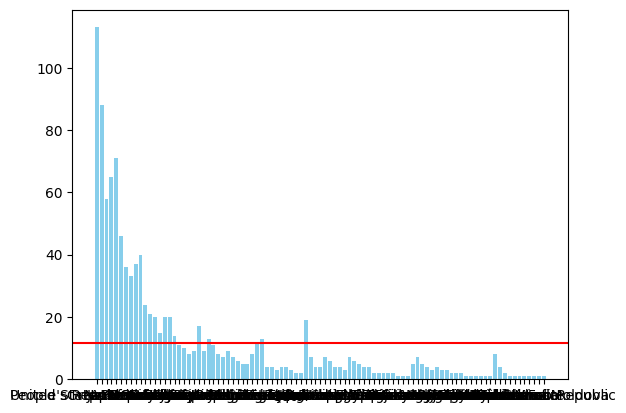

In [27]:
fig_1, ax_1 = plt.subplots()
ax_1.bar(medals['Country'],medals['Total'],color='skyblue')
ax_1.axhline(y = meanMedals, color='red', linestyle="-")

## Percentiles

Un enfoque distinto para estimar la dispersión, se centran en observar la distribución de los datos ordenados. Los estadísticos (estimadores) que tienen los datos ordenados, se denominan **de orden**. La medida más elemental, es el rango (diferencia entre valor máximo y mínimo) Es útil conocer este estadístico ya que podemos identificar valores atípicos, pero claro, es muy sensible a outliers.

Como ya nos imaginamos, el percentil es una medida estadística la cual divide una serie de datos ordenados de menor a mayor (commo la mediana o la moda) en 100 partes iguales. Se trata de un indicador que busca mostrar la proporción de la serie de datos que queda por debajo de su valor.

Ejemplo: El percentil 80 es el valor tal que al menos el 80% por ciento de los datos, quedan por debajo de él.
**P50** coincide con la mediana (Segundo cuartil -> Q2)

Como no hacemos hincapié en el cálculo de intervalos para datos agrupados, entenderemos gráficamente las nociones de cuartiles y percentiles y veremos como calcularlos con python.

### Dato:
El cuantil 0.8 es lo mismo que el percentil 80

### Nota:

Una medida habitual de la variabilidad es la diferencia entre el percentil 25 y el percentil 75. A esto se lo denomina rango intercuartilico. Este es parte de los indicadores robustos.

Ejemplo:

A = {1,2,3,3,5,6,7,9}

A = {1,2,3,3,5,6,7,9}

Media:  0    4.5
dtype: float64
Desvío estándar:  0    2.725541
dtype: float64
Q3:  [6.25]
q3 - q1:  [6.25 2.75]
rango intercuartil:  3.5
Data example describe:                0
count  8.000000
mean   4.500000
std    2.725541
min    1.000000
25%    2.750000
50%    4.000000
75%    6.250000
max    9.000000


<AxesSubplot: >

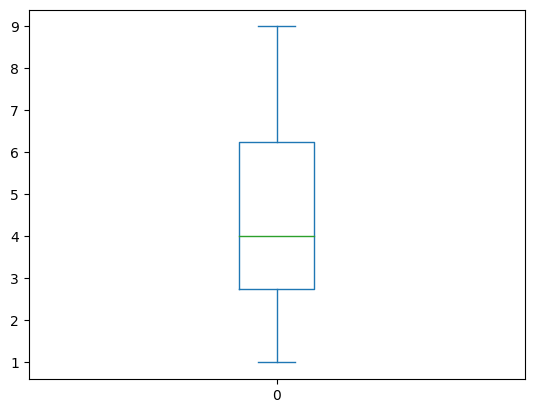

In [39]:
data_example = pd.DataFrame([1,2,3,3,5,6,7,9])
# data_example.plot(kind='box')
print("Media: ", data_example.mean()) #ventaja de usar pandas -> no uso statistics
print("Desvío estándar: ", data_example.std())
# percentiles
# El 75% está por debajo de 6.25
print("Q3: ",np.percentile(data_example,[75]))
print("q3 - q1: ",np.percentile(data_example,[75,25]))
print("rango intercuartil: ",6.25-2.75)
print("Data example describe: ", data_example.describe())

data_example.plot(kind='box')

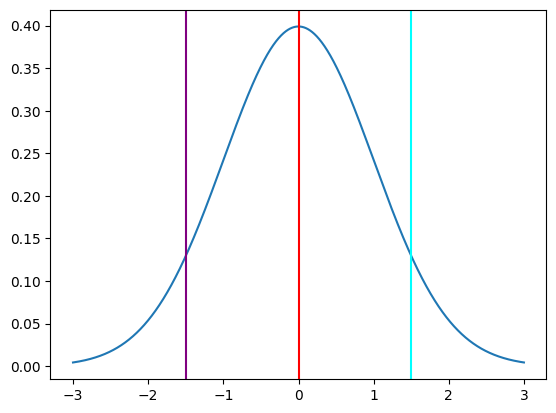

In [66]:
from scipy.stats import norm
x_norm = np.arange(-3,3,0.001) #intervalo
plt.plot(x_norm,norm.pdf(x_norm,0,1))
plt.axvline(x=0,color='red', linestyle='-')
plt.axvline(x=-1.5,color='purple', linestyle='-')
plt.axvline(x=1.5,color='cyan', linestyle='-')

### Otras medidas de dispersión robustas

Como viemos, la **varianza y el desvío estándar** son los estadísticos de variabilidad más difundidos. Ambos son sensibles a valores atípicos así que si queres ir por este camino, tenes que estudiar tu set de datos.

Entre las métricas más robustas para estudiar la variabilidad se encuentran:
- **La desviación absoluta media** -> MAD
- **La desviación absoluta mediana**
- **Percentiles** -> En particular, el rango intercuartil

## Exploración en la distribución de datos

### Diagramas de caja:

Es un diagrama que nos permite visualizar de forma rápida la distribucion de los datos basados en percentiles. En general es muy común que los cuartiles nos brinden información detallada de como se distribuyen los datos

In [45]:
murder = pd.read_csv('files/murder.csv')
murder

/var/folders/dm/31qyb_7s0nqdwc9x5b64b6kdphc6zs/T/ipykernel_39888/2329618669.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  murder = pd.read_csv('files/murder.csv')


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


count    638453.000000
mean         20.322697
std          17.886843
min           0.000000
25%           0.000000
50%          21.000000
75%          31.000000
max          99.000000
Name: Perpetrator Age, dtype: float64

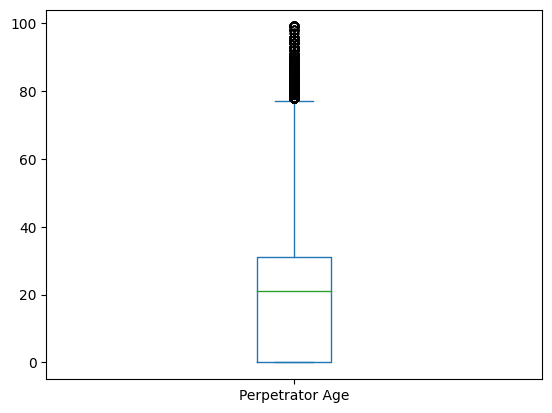

In [49]:
murder_perpetrator_age = pd.to_numeric(murder["Perpetrator Age"], downcast="float",errors='coerce')
murder_perpetrator_age.plot(kind='box')
murder_perpetrator_age.describe()

## Por que es un diagrama preciso?

Es preciso ya que no usa datos individuales. Min, max, Q1,Q2,Q3

## Ejemplo

Moneda: P(cara) = 1/2, P(cruz) = 1/2 (evento aleatorio equiprobable) = 1/2 + 1/2
Dados : P(1) = 1/6 .... P(6) = 1/6


In [67]:
# 2 DADOS
# suma de dos dados (dado 1 salga un 1 y dado 2 salga un 1) = 1/6 * 1/6
datos = pd.DataFrame({'numeros' : [2,3,4,5,6,7,8,9,10,11,12], 'probabilidades':["1/36","2/36","3/36","4/36","5/36","6/36","5/36","4/36","3/36","2/36","1/36"],'numerico':[1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]})
datos.transpose()

,0,1,2,3,4,5,6,7,8,9,10
numeros,2,3,4,5,6,7,8,9,10,11,12
probabilidades,1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36
numerico,0.027778,0.055556,0.083333,0.111111,0.138889,0.166667,0.138889,0.111111,0.083333,0.055556,0.027778


## Distribución de probabilidad

En teoría de la probabilidad y estadística, la distribución de probabilidad de una variable aleatoria es una función que asigna a cada suceso definido sobre la variable, la probabilidad de que dicho suceso ocurra.

Existe una relación estrecha con las distribuciones de frecuencia. De hecho, una distribución de probabilidades puede comprenderse como una frecuencia teórica, ya que describe cómo se espera que varíen los resultados.

## Tipos de variables

Variable aleatoria: Es aquella cuyo valor es el resultado de un evento aleatorio. Lo que quiere decir que son los resultados que se presentan al azar en cualquier evento o experimento.

Variable aleatoria discreta: Toma ciertos valores

Variable aleatoria continua: rango de valores

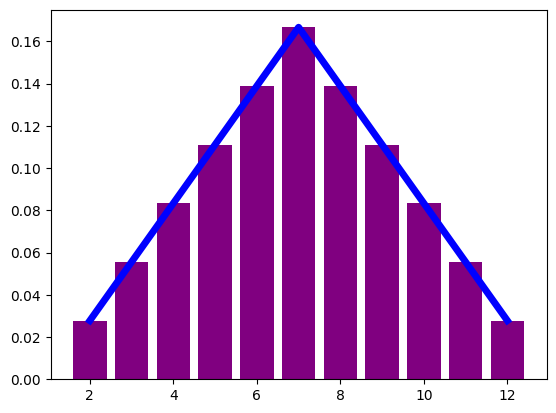

In [63]:
fig_6, ax_6 = plt.subplots()
ax_6.bar(datos['numeros'],datos['numerico'], color='purple')
ax_6.plot([2,3,4,5,6,7,8,9,10,11,12],datos['numerico'],color='blue',linewidth=5)
plt.show()

## Polígono de frecuencias

Un polígono de frecuencias es un gráfico usado en estadística para mostrar la frecuencia con la que cambia una variable o categoría.

Para crear uno necesitas un histograma de datos